In [191]:
import cv2
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [192]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

def gaussian_blur(img, kernel_size):
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


def warp_perspective(img,mat):
    return cv2.warpPerspective(img ,mat ,(1280,720))
    
def PerspectiveTransform(src,dst):
    mat = cv2.getPerspectiveTransform(src,dst)
    mat_inv = cv2.getPerspectiveTransform(dst,src)
    return mat,mat_inv

def trans2hls(image):
    img_hls = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    (h,l,s) = cv2.split(img_hls)
    return s
    

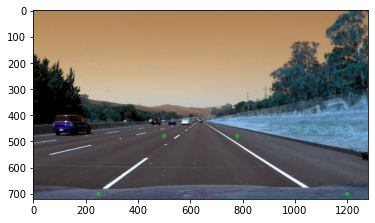

In [193]:
input_top_left = [500,480]
input_top_right = [780,480]
input_bottom_right = [1200,700]
input_bottom_left = [250,700]
srcPts = np.float32([input_bottom_left,input_top_left,input_top_right,input_bottom_right])
dstPts = np.float32([[0,720],[0,0],[1280,0],[1280,720]])


img=cv2.imread(r"Assets\Project_data\test_images\straight_lines2.jpg")

for x in range(0,4):
    cv2.circle(img, (int(srcPts[x][0]),int(srcPts[x][1])), 5, (0, 255, 0), 2)
    

plt.imshow(img)

In [194]:
cap = cv2.VideoCapture(r"Assets\Project_data\br_Trim.mp4")



In [195]:
count = 0
while cap.isOpened():
  ret,frame = cap.read()
  if not ret:
      break
  
    
  
  dst_points = np.float32([[frame.shape[1] // 3,720],[frame.shape[1] // 3,0],[2 *( frame.shape[1] // 3),0],[2 * (frame.shape[1] // 3),720]])
  mat,mat_inv = PerspectiveTransform(srcPts,dstPts)
  bird_view = warp_perspective(frame,mat)


      
  count = count + 1
  # gray = cv2.cvtColor(bird_view, cv2.COLOR_BGR2GRAY)
  darkened = adjust_gamma(bird_view,0.2)
  edges = cv2.Canny(darkened,100,200)
  lines =cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength=60,maxLineGap=30)
  try:
    for line in lines:
      lastSeenLines = lines
      x1,y1,x2,y2 = line[0]
      cv2.line(bird_view,(x1,y1),(x2,y2),(0,255,0),2)
  except:
    for line in lastSeenLines:
      x1,y1,x2,y2 = line[0]
      cv2.line(bird_view,(x1,y1),(x2,y2),(0,255,0),2)
    
  re_gen = warp_perspective(bird_view,mat_inv)
  image = np.zeros_like(frame)
  cv2.addWeighted(frame, 0.5, re_gen, 0.5,0, image)
  cv2.imshow('window-name', bird_view)
      
  if cv2.waitKey(25) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()
